In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('default') 

In [2]:
df_eventos = pd.read_csv('events.csv', low_memory =False)
df_eventos.head(5)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visitantes de Trocafone



In [ ]:
residencia_eventos = df_eventos[['event','city','region','country']]
residencia_eventos.head()

Se puede observar que estos datos se registran cada vez que el sitio es visitado, entonces nos quedaremos solamente con aquellos eventos.

In [ ]:
residencia_visitantes=residencia_eventos.loc[(residencia_eventos['event']=='visited site'),['city','region','country']]

In [ ]:
residencia_visitantes['country'].value_counts().head()

In [ ]:
residencia_visitantes['Live in Brazil'] = (residencia_visitantes['country']=='Brazil')
visitantes_en_brasil = residencia_visitantes['Live in Brazil'].value_counts()
grafico_paises = visitantes_en_brasil.plot(kind='pie',autopct='%1.1f%%',figsize=(8,8),fontsize=0,colors=['green','yellow'],explode=(0.1, 0))
grafico_paises.set_title('Visitantes de la página en Brasil',fontsize = 22)
grafico_paises.set_ylabel('')
leyenda=plt.legend(['Brasil','Resto del mundo'],fontsize=12,title='País',frameon=True,facecolor='white',edgecolor='black')
leyenda.get_frame().set_linewidth(1.0)

Se puede observar en el gráfico superior que por una mayoría abrumadora, los visitantes del sitio web son residentes de Brasil, dejando una mínima parte para el resto del mundo. Dentro de estos últimos los países que se destacan son Estados Unidos y Argentina, en ese orden.

In [3]:
df_eventos['vive en Brasil'] = df_eventos['country']=='Brazil'
personas_en_Brasil = df_eventos[['person','event','city','region']]


In [4]:
personas_en_Brasil_copia_original =df_eventos[['person','vive en Brasil']]
personas_en_Brasil_copia = personas_en_Brasil_copia_original.loc[personas_en_Brasil_copia_original['vive en Brasil']==True]
personas_en_Brasil_copia.head()

,person,vive en Brasil
1,0004b0a2,True
5,0006a21a,True
9,000a54b2,True
16,000a54b2,True
45,00184bf9,True


In [5]:
personas_en_Brasil = pd.merge(personas_en_Brasil,personas_en_Brasil_copia, how='inner', on='person')
personas_en_Brasil.head()

,person,event,city,region,vive en Brasil
0,0004b0a2,ad campaign hit,NaN,NaN,True
1,0004b0a2,visited site,Camaragibe,Pernambuco,True
2,0004b0a2,viewed product,NaN,NaN,True
3,0004b0a2,checkout,NaN,NaN,True
4,0006a21a,viewed product,NaN,NaN,True


In [6]:
lugares_eventos=personas_en_Brasil_copia_original.groupby('person').agg({'vive en Brasil':'sum'})
lugares_eventos['vive en Brasil'] = lugares_eventos['vive en Brasil']>0
lugares_eventos.head(10)

,vive en Brasil
person,
0004b0a2,True
0006a21a,True
000a54b2,True
00184bf9,True
0019c395,True
001bb7eb,True
001f1653,True
00204059,False
0020f73c,False


In [7]:
cant_eventos_Brasil = personas_en_Brasil['event'].value_counts()

Text(0.5,0,'Cantidad(log)')

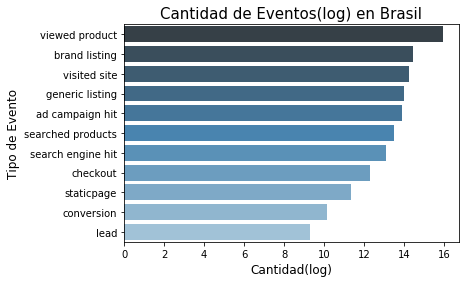

In [8]:
grafico_eventos_pais =sns.barplot(np.log(cant_eventos_Brasil.values),cant_eventos_Brasil.index,palette ='Blues_d')
grafico_eventos_pais.set_title("Cantidad de Eventos(log) en Brasil",fontsize=15)
grafico_eventos_pais.set_ylabel("Tipo de Evento",fontsize=12)
grafico_eventos_pais.set_xlabel("Cantidad(log)",fontsize=12)

In [9]:
#Intentar hacer el mismo gráfico de arriba para aquellos ids que están fuera de Brasil, y realizar un Stacked bar plot para
#Comparar ambas cosas

In [10]:
df_eventos= pd.merge(df_eventos,lugares_eventos,how='inner',on='person')
df_eventos.head(10)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,vive en Brasil_x,vive en Brasil_y
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,True,True
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1,True,True
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0,True,True


In [11]:
del df_eventos['vive en Brasil_x']
df_eventos.rename(columns={'vive en Brasil_y':'vive en Brasil'})

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,vive en Brasil
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,True
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1,True
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0,True


In [13]:
df_eventos['vive en Brasil_y'].value_counts()

True     987604
False     23684
Name: vive en Brasil_y, dtype: int64

Text(0,0.5,'Cantidad')

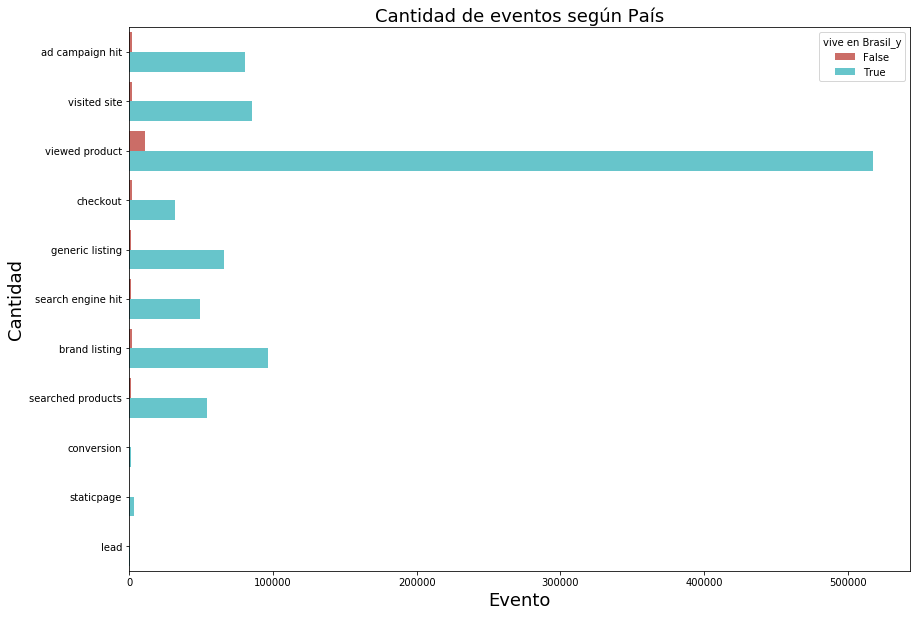

In [22]:

fig , ax=plt.subplots(figsize=(14,10))
g=sns.countplot(y="event",ax=ax, hue="vive en Brasil_y", data=df_eventos, palette="hls")
g.set_title("Cantidad de eventos según País", fontsize=18)
g.set_xlabel("Evento", fontsize=18)
g.set_ylabel("Cantidad", fontsize=18)


## Regiones de Brasil

In [ ]:
visitas_por_region = df_eventos.loc[(df_eventos['country']=='Brazil'),'region']
visitas_por_region.value_counts().head(10)

Muchos de las visitas dadas en Brasil, no tienen información sobre que región provienen, por las cuales las trataremos como una "región" más porque se trata de un gran porcentaje de los datos. 

In [ ]:
grafico_visitas_regiones = sns.barplot(visitas_por_region.value_counts().head(10).values,visitas_por_region.value_counts().head(10).index)
sns.color_palette("muted", n_colors=10)
grafico_visitas_regiones.set_title("Cantidad de Visitas(TOP 10) por región",fontsize=15)
grafico_visitas_regiones.set_ylabel("Región de Brasil",fontsize=12)
grafico_visitas_regiones.set_xlabel("Cantidad",fontsize=12)